# Internet Service Provider Research

## Intro
The goal of this report is to get an idea of the WISP landscape in Pennsylvania (specifically Montgomery County), and identify any untapped wireless markets, geographic or otherwise.

***
###  A Warning from the FCC (IMPORTANT)
From the [explanation of FCC Data](https://www.fcc.gov/general/explanation-broadband-deployment-data):  A provider that reports deployment of a particular technology and bandwidth in a particular census block may not necessarily offer that particular service everywhere in the census block. Accordingly, a list of providers deployed in a census block does not necessarily reflect the number of choices available to any particular household or business location in that block, and the number of such providers in the census block does not purport to measure competition.

#### My thoughts on this
The conclusions we draw here will have to be taken with a grain of salt, and will need to do additional research to verify any insights.

***
## Initial Exploration

Before we do some filtering, lets take a look the raw stats of WISPS in PA.

In [1]:
# imports and settings
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
import datetime as dt
from IPython.core.display import display, HTML
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 200
from IPython.display import display, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Reading in FCC isp data
filepath = "../data/bb_data.csv"
isp_df = pd.read_csv(filepath)

# Reading in population densities
filepath = "../data/us2016.csv"
pop_df = pd.read_csv(filepath)

In [139]:
# Pennsylvania population density
pa_pop_df = pop_df[pop_df['stateabbr'] == 'PA']
isp_df = isp_df[isp_df['State'] == 'PA']

'''
Population information:

hu = housing units
hh = households
pop = population

'''
cols = ['stateabbr','block_fips','hu2016','hh2016','pop2016']
pa_pop_df = pa_pop_df[cols]

pop_rows = pa_pop_df.shape[0]
pop_cols = pa_pop_df.shape[1]

isp_col_names = isp_df.columns.values
isp_rows = isp_df.shape[0]
isp_cols = isp_df.shape[1]

In [123]:
# Markdown
Markdown("""
### The Data
#### isp Data
The table of PA isp's has {isp_rows} rows and {isp_cols} columns.  See a preview of the table below.
""".format(isp_rows = isp_rows, isp_cols = isp_cols))


## The Data
### WISP Data
The table of PA WISP's has 2588294 rows and 17 columns.  See a preview of the table below.


In [119]:
# Table preview
isp_df.head()

,Logical Record Number,Provider ID,FRN,Provider Name,DBA Name,Holding Company Name,Holding Company Number,Holding Company Final,State,Census Block FIPS Code,Technology Code,Consumer,Max Advertised Downstream Speed (mbps),Max Advertised Upstream Speed (mbps),Business,Max CIR Downstream Speed (mbps),Max CIR Upstream Speed (mbps)
26,24835260,27193,11548526,PenTeleData Limited Partnership I,PenTeleData Limited Partnership I,"Pencor Services, Inc.",131026,"Pencor Services, Inc.",PA,420710129003011,50,1,1000.0,1000.000,1,0.0,0.0
42,26114547,27423,3273505,Verizon Pennsylvania LLC,Verizon Pennsylvania LLC,Verizon Communications Inc.,131425,Verizon Communications Inc.,PA,420110139004075,10,1,3.0,0.768,1,0.0,0.0
59,68023772,29201,19085687,"Sunesys, LLC","Sunesys, LLC",Crown Castle International Corp.,300121,Crown Castle International Corp.,PA,421010365012007,50,0,0.0,0.000,1,1000.0,1000.0
93,26100082,27423,3273505,Verizon Pennsylvania LLC,Verizon Pennsylvania LLC,Verizon Communications Inc.,131425,Verizon Communications Inc.,PA,420035615003018,50,1,940.0,880.000,1,0.0,0.0
105,8305879,25569,12369286,"HNS License Sub, LLC",HughesNet,Hughes Network Systems,130627,"dishNET Holding, LLC",PA,420410102041004,60,1,15.0,2.000,1,15.0,2.0


In [145]:
# Some markdown
Markdown("""
#### Population Data
The table of PA Census Block population data has {pop_rows} rows and {pop_cols} columns. HU = Housing Units.  HH = Households.  POP = population.  See a preview of the table below.
""".format(pop_rows = pop_rows, pop_cols = pop_cols))


#### Population Data
The table of PA Census Block population data has 421545 rows and 5 columns. HU = Housing Units.  HH = Households.  POP = population.  See a preview of the table below.


In [141]:
#Table preview
pa_pop_df.head()

,stateabbr,block_fips,hu2016,hh2016,pop2016
8103116,PA,420010301011000,3,3.0,6
8103117,PA,420010301011001,9,9.0,31
8103118,PA,420010301011002,6,6.0,15
8103119,PA,420010301011003,28,27.0,79
8103120,PA,420010301011004,10,10.0,27


In [144]:
# Intial Metrics
business_count = (isp_df[isp_df['Business']==1].shape[0]/isp_df.shape[0])
consumer_count = (isp_df[isp_df['Consumer']==1].shape[0]/isp_df.shape[0])
pa_pop_metrics = (pa_pop_df['pop2016'].describe())

print(f'Percent of all isps that can offer service to businesses:  {business_count}')
print(f'Percent of all isps that can offer service to consumers:  {consumer_count}')
print(f'Some metrics for PA census block population data:  \n{pa_pop_metrics}')

Percent of all WISPs that can offer service to businesses:  0.9747459137176843
Percent of all WISPs that can offer service to consumers:  0.811675566995094
Some metrics for PA census block population data:  
count    421545.000000
mean         30.303339
std          62.219867
min           0.000000
25%           0.000000
50%          11.000000
75%          36.000000
max        4538.000000
Name: pop2016, dtype: float64


## Some figures

Plots of up & downstream speeds for Business and Consumer WISPS.

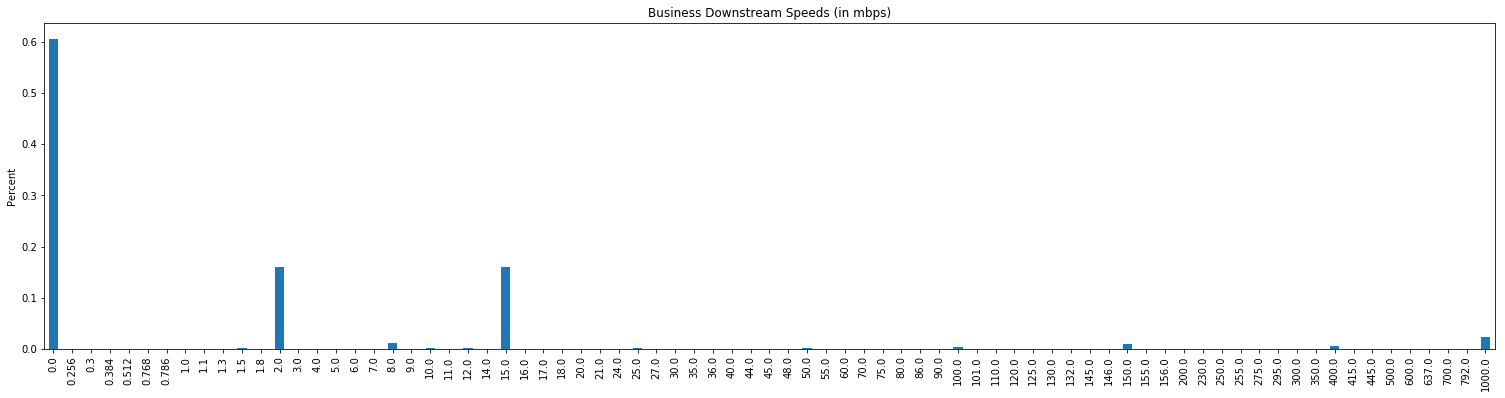

In [152]:
# Plots
fig_length = 26
fig_height = 6
# Down speeds look like for businesses in PA
plt.figure(figsize=(fig_length,fig_height))
plt.title('Business Downstream Speeds (in mbps)')
plt.ylabel('Percent')
b_down_val_counts = isp_df['Max CIR Downstream Speed (mbps)'][isp_df['Business']==1].value_counts(normalize=True, sort = True).sort_index().plot(kind='bar')

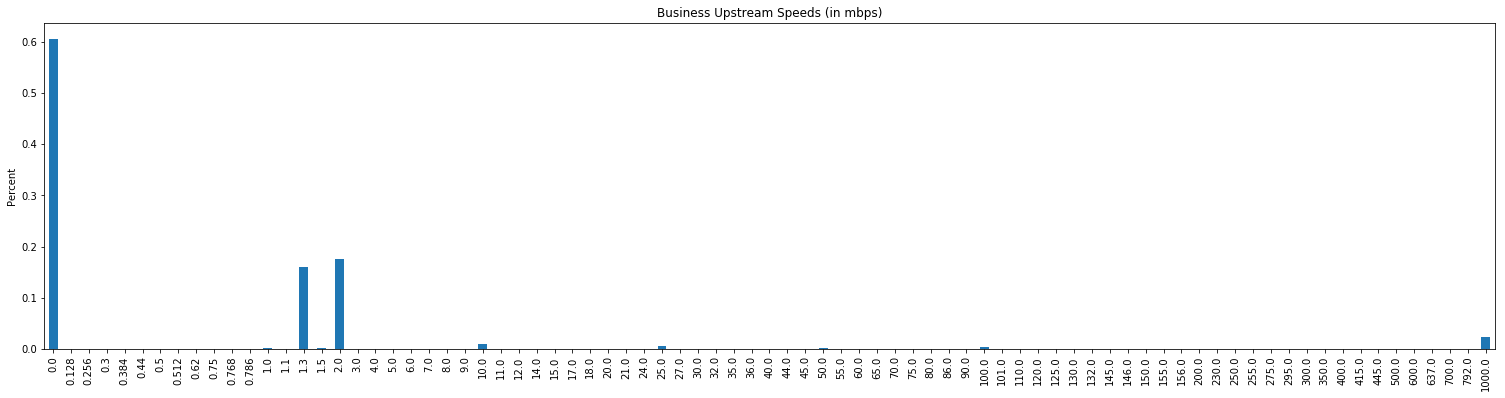

In [125]:
# Up speeds for businesses in PA
plt.figure(figsize=(fig_length,fig_height))
plt.title('Business Upstream Speeds (in mbps)')
plt.ylabel('Percent')
b_up_val_counts = isp_df['Max CIR Upstream Speed (mbps)'][isp_df['Business']==1].value_counts(normalize=True, sort = True).sort_index().plot(kind='bar')

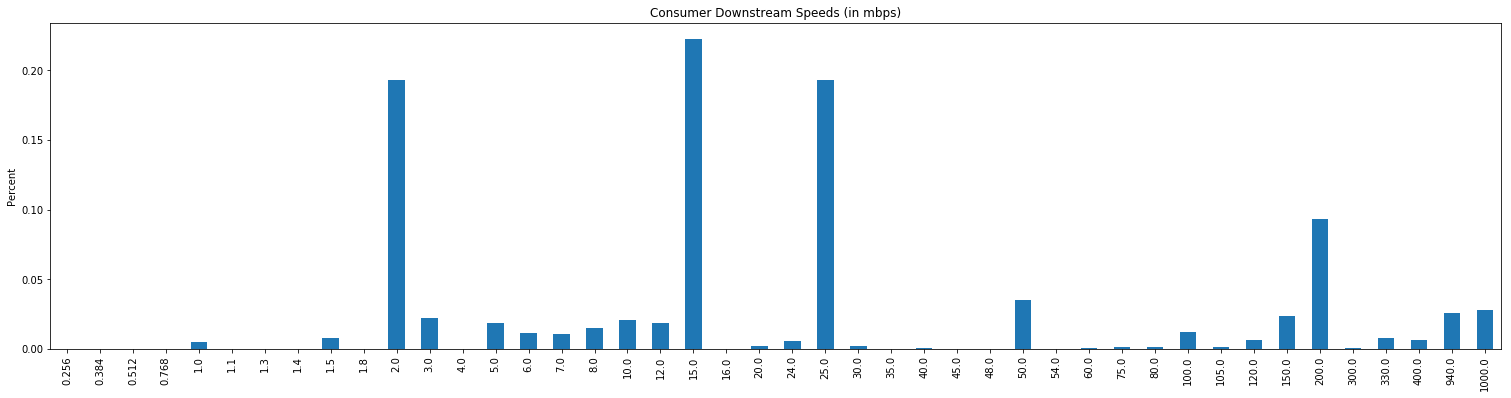

In [126]:
# Residential downstream speeds in PA
plt.figure(figsize=(fig_length,fig_height))
plt.title('Consumer Downstream Speeds (in mbps)')
plt.ylabel('Percent')
r_down_val_counts = isp_df['Max Advertised Downstream Speed (mbps)'][isp_df['Consumer']==1].value_counts(normalize=True, sort = True).sort_index().plot(kind='bar')

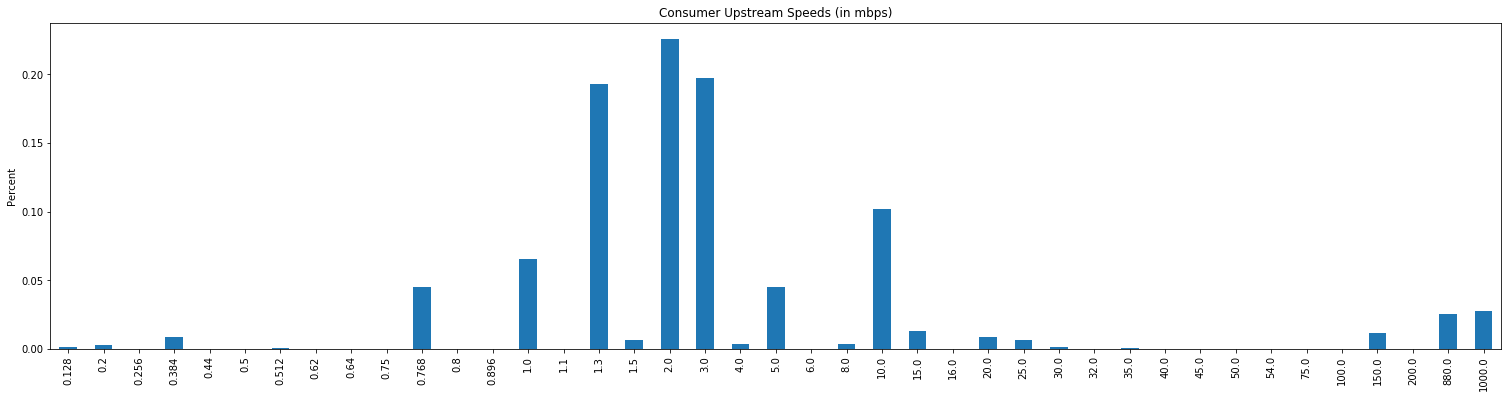

In [127]:
# Residential upstream speeds in PA
plt.figure(figsize=(fig_length,fig_height))
plt.title('Consumer Upstream Speeds (in mbps)')
plt.ylabel('Percent')
r_up_val_counts = isp_df['Max Advertised Upstream Speed (mbps)'][isp_df['Consumer']==1].value_counts(normalize=True, sort = True).sort_index().plot(kind='bar')

## Filtering the ispS

See the [explanation of FCC Data](https://www.fcc.gov/general/explanation-broadband-deployment-data) here for clarification on columns.

The function below filters the available list of isps to be analyzed. Attributes on which to filter:
<br>
Max Advertised Upstream Speed (mbps) ** greater than or equal to 5**
<br>
Max Advertised Downstream Speed (mbps) ** greater than or equal to 25**
<br>
Max CIR Upstream Speed (mbps)  ** greater than or equal to 5**
<br>
Max CIR Downstream Speed (mbps)** greater than or equal to 25**
<br>
Business (Provider can or does offer business/government service in the block) **must be True**
<br>
Consumer (Provider can or does offer consumer/mass market/residential service in the block)  **currently not filtered**
<br>
### A Quick Note
From the [explanation of FCC Form 477 data](https://www.fcc.gov/general/explanation-broadband-deployment-data): Filer directed to report 0 if the contracted service is sold on a "best efforts" basis without a guaranteed data-throughput rate.  
<br>
Because of this, a isp will be considered eligble for further analysis if its **Max Advertised or CIR up/downstream is greater than or equal to filter value**.

In [128]:
# Function to filter ispS
def filter_isps(raw_df):
    start_t = dt.datetime.now()
    max_up = 5
    max_down = 25
    business = 1
    consumer = 1
    #state = 'PA'
    raw_df = raw_df[(raw_df['Max Advertised Upstream Speed (mbps)'] >= max_up) | (raw_df['Max CIR Upstream Speed (mbps)'] >= max_up) ]
    raw_df = raw_df[(raw_df['Max Advertised Downstream Speed (mbps)'] >= max_down) | (raw_df['Max CIR Downstream Speed (mbps)'] >= max_down)]
    raw_df = raw_df[(raw_df['Business'] == business)]
    #raw_df = raw_df[raw_df['State'] == state]
    final_t = dt.datetime.now()
    #print(f'took {final_t - start_t} to run!')
    return raw_df

pa_isp_df = filter_isps(isp_df)
#pa_isp_df.shape

In [131]:
# Montgomery Filter
'''
Create Montgomery county subsets

PA state FIPS code 42
Montgomery county FIPS code 091
'''
pa_pop_df['block_fips']= pa_pop_df['block_fips'].apply(str)
pa_pop_df['mont_county'] = pa_pop_df['block_fips'].map(lambda x: True if x[:5] == '42091' else False)
mont_pop_df = pa_pop_df[pa_pop_df['mont_county']==True]

pa_isp_df['Census Block FIPS Code'] = pa_isp_df['Census Block FIPS Code'].apply(str)
pa_isp_df['mont_county'] = pa_isp_df['Census Block FIPS Code'].map(lambda x: True if x[:5] == '42091' else False)
mont_isp_df = pa_isp_df[pa_isp_df['mont_county'] == True]

filtered_isp_rows = pa_isp_df.shape[0]
filtered_county_rows = mont_isp_df.shape[0]

pa_blocks = pa_pop_df.shape[0]
mont_blocks = mont_pop_df.shape[0]


#print(f'number of blocks in montgomery county:  {mont_blocks}')
#print(f'number of eligble isps in montgomery county:  {filtered_county_rows}')

In [132]:
#Filtered Results
Markdown("""
## Filtered Results
After filtering, the total number of eligble isps in PA is **{filtered_isp_rows}**, down from {isp_rows}, with {pa_blocks} census blocks in PA. <br>
After filtering, the number of eligible isps in Montgomery County is **{filtered_county_rows}**, and there are {mont_blocks} census blocks in Montgomery County.
""".format(filtered_isp_rows = filtered_isp_rows, isp_rows = isp_rows, pa_blocks = pa_blocks, filtered_county_rows = filtered_county_rows, mont_blocks = mont_blocks))


## Filtered Results
After filtering, the total number of eligble wisps in PA is **560941**, down from 2588294, with 421545 census blocks in PA. <br>
After filtering, the number of eligible wisps in Montgomery County is **26162**, and there are 13769 census blocks in Montgomery County.


In [133]:
# Using the groubpy function to get metrics for each census block: count, types, mean up/down speeds
def get_metrics(raw_df):
    
    # A count of all the unique isp's in a given census block,  if block isn't included in dataframe, then there are no isps in that block
    isp_count_df = pd.DataFrame({'isp_count':raw_df.groupby(['Census Block FIPS Code']).size()}).reset_index()
    isp_count_df.set_index('Census Block FIPS Code', inplace=True)

    # Number of isps allowed to serve consumers in the given block
    consumer_df = pd.DataFrame({'consumer_num':raw_df.groupby(['Census Block FIPS Code','Consumer']).size()}).reset_index()
    consumer_df = consumer_df[consumer_df['Consumer']==1]
    consumer_df.set_index('Census Block FIPS Code', inplace=True)

    # Number of isps allowed to serve businesses in the given block
    business_df = pd.DataFrame({'business_num':raw_df.groupby(['Census Block FIPS Code', 'Business']).size()}).reset_index()
    business_df = business_df[business_df['Business']==1]
    business_df.set_index('Census Block FIPS Code', inplace = True)

    # Average up/downstream speeds in each census block
    adv_max_down_df = pd.DataFrame({'adv_max_down':raw_df.groupby(['Census Block FIPS Code'])['Max Advertised Downstream Speed (mbps)'].max()}).reset_index()
    adv_max_down_df.set_index('Census Block FIPS Code', inplace = True)
    
    adv_max_up_df = pd.DataFrame({'adv_max_up':raw_df.groupby(['Census Block FIPS Code'])['Max Advertised Upstream Speed (mbps)'].max()}).reset_index()
    adv_max_up_df.set_index('Census Block FIPS Code', inplace = True)
    
    cir_max_up_df = pd.DataFrame({'cir_max_up':raw_df.groupby(['Census Block FIPS Code'])['Max CIR Upstream Speed (mbps)'].max()}).reset_index()
    cir_max_up_df.set_index('Census Block FIPS Code', inplace = True)
    
    cir_max_down_df = pd.DataFrame({'cir_max_down':raw_df.groupby(['Census Block FIPS Code'])['Max CIR Downstream Speed (mbps)'].max()}).reset_index()
    cir_max_down_df.set_index('Census Block FIPS Code', inplace = True)
    
    #TODO: Merge the 7 df's
    df_list = [isp_count_df,consumer_df,business_df,adv_max_down_df,adv_max_up_df,cir_max_up_df,cir_max_down_df]
    #print('Merging dataframes...')
    for i in df_list:
        if isp_count_df.equals(i):
            final_df = isp_count_df
        else:
            final_df = pd.merge(final_df,i,how='outer',left_index=True, right_index=True)
    #print('Done merging dataframes!')
    final_df.drop(['Consumer', 'Business'], axis = 1, inplace = True)
    return final_df 


# Get metrics for montgomery county
mont_metrics_df = get_metrics(mont_isp_df)
# Get metrics for all of PA
pa_metrics_df = get_metrics(pa_isp_df)

In [134]:
# Merging population data and isp metrics
def merge_pop_isp(pop_df,isp_df):
    if (pop_df.index.name != 'block_fips'):
        pop_df.set_index('block_fips',inplace = True)
    final_df = pd.merge(pop_df, isp_df,how = 'left', left_index = True, right_index = True)
    final_df.fillna(value = 0, inplace = True)
    final_df['density'] = final_df['isp_count']/ (final_df['pop2016'] + 1)
    final_df.reset_index(inplace = True)
    final_df['best_available_up'] = final_df[['cir_max_up','adv_max_up']].max(axis = 1)
    final_df['best_available_down'] = final_df[['cir_max_down','adv_max_down']].max(axis = 1)
    return final_df 

# Merging metrics with population data
county_df = merge_pop_isp(mont_pop_df, mont_metrics_df)
state_df = merge_pop_isp(pa_pop_df, pa_metrics_df)

In [87]:
## wrtie PA files to csv's
pa_isp_df.to_csv('../data/pa_bb.txt')
pa_pop_df.to_csv('../data/pa_pop.txt')

# Write county and state metrics data to csv
county_df.to_csv('../data/montgomery_isp_metrics.txt')
state_df.to_csv('../data/pa_isp_metrics.txt')

## Some Basic Measures

What are the important measures we want to see?
***
isp breakdown by census block
<br>
Density map (isp/population) in a given block
<br>
Heat-map of number of isps operating in given census block (filter by type, up/down speed)
<br>
Correlation between isp/population

In [135]:
# Eligble ispS in an area
pa_value_counts = state_df['isp_count'].value_counts(normalize = True)
print(f'Number of eligble isps operating in each block in PA: \n{pa_value_counts}')

Number of eligble wisps operating in each block in PA: 
0.0     0.319297
1.0     0.281114
2.0     0.222961
3.0     0.118768
4.0     0.044377
5.0     0.011842
6.0     0.001229
7.0     0.000244
8.0     0.000081
9.0     0.000045
10.0    0.000021
12.0    0.000009
13.0    0.000005
16.0    0.000002
11.0    0.000002
14.0    0.000002
Name: wisp_count, dtype: float64


In [137]:
## Correlation between 2016 population and number of isp's in a given census block
state_corr = np.corrcoef(state_df['pop2016'],state_df['isp_count'].values)
county_corr = np.corrcoef(county_df['pop2016'],county_df['isp_count'].values)
print(f'The correlation between population and isp count in Montgomery County:  {round(county_corr[0][1],3)}')
print(f'The correlation between population and isp count in PA:  {round(state_corr[0][1],3)}')

The correlation between population and wisp count in Montgomery County:  0.292
The correlation between population and wisp count in PA:  0.286


In [138]:
# High-level metrics on density (# of isps/population in a given block)
state_density_describe = state_df['density'].describe()
county_density_describe = county_df['density'].describe()

print(f'High level county density metrics: \n{county_density_describe}')
print(f'High level state density metrics:  \n{state_density_describe}')

High level state density metrics:  
count    421545.000000
mean          0.224408
std           0.569453
min           0.000000
25%           0.000000
50%           0.034483
75%           0.125000
max          13.000000
Name: density, dtype: float64
High level county density metrics: 
count    13769.000000
mean         0.167519
std          0.415670
min          0.000000
25%          0.019802
50%          0.041667
75%          0.095238
max          7.000000
Name: density, dtype: float64


### Heat-map and Other Visualizations
See the Tableau project for repository found [here](https://public.tableau.com/profile/martin.moesta#!/vizhome/WISPv3/WISPStory). ** Majority of vizualization/analysis can be found here**. Can also go a lot of different directions with these visualizations, we can discuss next steps next time we talk.

Viewing these viz in the browser may be a little slow since there is a lot of data there.  No lag in viewing/interacting if you download Tableau Public and view the Story in there.

This "story" contains three visualizations:
<br>
* A heat-map of census blocks vs. filtered ispS in Montgomery County.  Visualization is interactive, you can hover, click, filter, etc.  We can go over all functionality via Skype
* A closer look at highly populated areas with 1 or fewer eligible ispS
* % Distribution of ispS in a given Census Block